In [1]:
from Model.DCVAE import DCVAE_Style
from Model.Utils import PlotHistory, PlotDataAE, Save_Model, MPS_Generator
from Model.Utils import load_from_tfrecords, convert_to_tfrecords, load_numpy, model_plot
from keras.optimizers import RMSprop,Adam
import numpy as np
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True
create_tfrecords = False

path_tfr = 'DataSet/MPS60'
path_npy = '/share/GeoFacies/ModelosDeFacies/ModelMPS60/DataSet/DataSet.npy'
batch_size = 32

In [3]:
if load_tfrecords:
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr, x_train, x_test)
        gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
    else:
        try:
            gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
    
    gen_train = MPS_Generator(os.path.join(path_tfr, 'train.tfrecords'), gen_train.num)
    gen_test = MPS_Generator(os.path.join(path_tfr, 'test_val.tfrecords'), gen_test.num)
    x_train = gen_train.get_numpy_batch().astype('float32')
    x_test =gen_test.get_numpy_batch().astype('float32')
else:
    x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)

x_train = np.argmax(x_train,axis=-1)   
x_test = np.argmax(x_test,axis=-1)   

x_train = np.expand_dims(x_train, axis=-1)
x_train = 2*x_train-1
x_test = np.expand_dims(x_test, axis=-1)
x_test = 2*x_test-1

In [4]:
x_train.shape,x_test.shape,x_train.min()

((14000, 60, 60, 1), (6000, 60, 60, 1), -1)

# Create Convolutional Variational Autoencoder

In [5]:
path_weights = os.path.join(path_tfr, 'w60.hdf5')

model = DCVAE_Style(input_shape=(60,60,1),filters=[128,64,32],strides=[2,2,1],KernelDim=(3,3,3),hidden_dim=2048,
                    latent_dim=500,opt=Adam(lr=0.0001),dropout=0.1,epochs_drop=200,style_weight=np.linspace(30e-6,40e-6,9)[1],
                    kl_weight=2.0, reconstruction_weight=1800, act='tanh',filepath=path_weights)

# Training Network

In [6]:
num_epochs = 500
model.fit(x_train, num_epochs=num_epochs, batch_size = batch_size, x_v=x_test,verbose=1)

Setting up model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 30, 30, 128)  1280        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 15, 15, 64)   73792       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 15, 15, 32)   18464       conv2d_2

Epoch 1/500


14000/14000 [==============================] - 32s 2ms/step - loss: 1940.0180 - acc_pred: 0.7033 - sum_style_loss: 13984341.0526 - val_loss: 1741.4868 - val_acc_pred: 0.7654 - val_sum_style_loss: 12191310.5013
Epoch 2/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1624.6674 - acc_pred: 0.8016 - sum_style_loss: 9393320.6857 - val_loss: 1494.8744 - val_acc_pred: 0.8336 - val_sum_style_loss: 6994639.4293
Epoch 3/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1459.8453 - acc_pred: 0.8481 - sum_style_loss: 5903256.9914 - val_loss: 1412.1806 - val_acc_pred: 0.8576 - val_sum_style_loss: 5138831.0853
Epoch 4/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1403.2187 - acc_pred: 0.8602 - sum_style_loss: 4893748.3823 - val_loss: 1373.9065 - val_acc_pred: 0.8630 - val_sum_style_loss: 4634848.5453
Epoch 5/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1373.9068 - acc_pred: 0.8664 - sum_style_loss: 4487586.6606 - val_loss: 1345.9095 - val_acc_pred: 0.8690 - val_sum_style_loss: 4416635.2187
Epoch 6/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1349.3471 - acc_pred: 0.8718 - sum_style_loss: 4235268.3186 - val_loss: 1322.9574 - val_acc_pred: 0.8762 - val_sum_style_loss: 4170209.0413
Epoch 7/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1328.0880 - acc_pred: 0.8766 - sum_style_loss: 4026655.1803 - val_loss: 1311.7832 - val_acc_pred: 0.8792 - val_sum_style_loss: 4008179.4613
Epoch 8/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1314.6449 - acc_pred: 0.8798 - sum_style_loss: 3894011.6851 - val_loss: 1294.3006 - val_acc_pred: 0.8817 - val_sum_style_loss: 3780265.5060
Epoch 9/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1301.6938 - acc_pred: 0.8827 - sum_style_loss: 3793413.4060 - val_loss: 1286.6857 - val_acc_pred: 0.8871 - val_sum_style_loss: 3673990.1913
Epoch 10/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1290.8582 - acc_pred: 0.8851 - sum_style_loss: 3711008.3874 - val_loss: 1275.2813 - val_acc_pred: 0.8858 - val_sum_style_loss: 3715989.6480
Epoch 11/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1281.6568 - acc_pred: 0.8868 - sum_style_loss: 3655066.5757 - val_loss: 1267.5367 - val_acc_pred: 0.8872 - val_sum_style_loss: 3652806.7427
Epoch 12/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1275.5036 - acc_pred: 0.8883 - sum_style_loss: 3603628.8349 - val_loss: 1259.4430 - val_acc_pred: 0.8892 - val_sum_style_loss: 3597974.1647
Epoch 13/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1267.9340 - acc_pred: 0.8898 - sum_style_loss: 3548740.7891 - val_loss: 1251.2450 - val_acc_pred: 0.8916 - val_sum_style_loss: 3476313.7060
Epoch 14/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1259.3741 - acc_pred: 0.8914 - sum_style_loss: 3506895.8766 - val_loss: 1243.1671 - val_acc_pred: 0.8924 - val_sum_style_loss: 3466355.2373
Epoch 15/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1249.6503 - acc_pred: 0.8931 - sum_style_loss: 3450919.0914 - val_loss: 1236.5287 - val_acc_pred: 0.8963 - val_sum_style_loss: 3341908.2020
Epoch 16/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1241.8648 - acc_pred: 0.8945 - sum_style_loss: 3400243.0734 - val_loss: 1231.3049 - val_acc_pred: 0.8965 - val_sum_style_loss: 3333187.9573
Epoch 17/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1232.7538 - acc_pred: 0.8959 - sum_style_loss: 3366369.1823 - val_loss: 1219.2973 - val_acc_pred: 0.8963 - val_sum_style_loss: 3379086.3247
Epoch 18/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1224.0457 - acc_pred: 0.8974 - sum_style_loss: 3329314.6623 - val_loss: 1210.3129 - val_acc_pred: 0.8983 - val_sum_style_loss: 3303798.7720
Epoch 19/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1213.6309 - acc_pred: 0.8989 - sum_style_loss: 3279597.9086 - val_loss: 1203.5205 - val_acc_pred: 0.8982 - val_sum_style_loss: 3286443.5960
Epoch 20/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1206.0843 - acc_pred: 0.9001 - sum_style_loss: 3247241.8163 - val_loss: 1193.9804 - val_acc_pred: 0.8987 - val_sum_style_loss: 3317020.1567
Epoch 21/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1197.9413 - acc_pred: 0.9013 - sum_style_loss: 3211297.3394 - val_loss: 1185.2055 - val_acc_pred: 0.9026 - val_sum_style_loss: 3183582.0920
Epoch 22/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1189.6953 - acc_pred: 0.9026 - sum_style_loss: 3176642.9320 - val_loss: 1178.0640 - val_acc_pred: 0.9022 - val_sum_style_loss: 3226208.0580
Epoch 23/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1181.5075 - acc_pred: 0.9039 - sum_style_loss: 3146201.1386 - val_loss: 1170.2478 - val_acc_pred: 0.9043 - val_sum_style_loss: 3139792.4560
Epoch 24/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1175.2138 - acc_pred: 0.9050 - sum_style_loss: 3114289.1251 - val_loss: 1162.4666 - val_acc_pred: 0.9055 - val_sum_style_loss: 3174122.0027
Epoch 25/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1167.9095 - acc_pred: 0.9059 - sum_style_loss: 3095061.0223 - val_loss: 1158.2055 - val_acc_pred: 0.9058 - val_sum_style_loss: 3043612.9433
Epoch 26/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1160.8363 - acc_pred: 0.9071 - sum_style_loss: 3066304.9074 - val_loss: 1150.7025 - val_acc_pred: 0.9063 - val_sum_style_loss: 3156494.0580
Epoch 27/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1152.8284 - acc_pred: 0.9084 - sum_style_loss: 3034309.3643 - val_loss: 1143.8460 - val_acc_pred: 0.9093 - val_sum_style_loss: 2988128.1593
Epoch 28/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1147.6057 - acc_pred: 0.9091 - sum_style_loss: 3018872.7671 - val_loss: 1136.5287 - val_acc_pred: 0.9101 - val_sum_style_loss: 3009683.6073
Epoch 29/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1139.2360 - acc_pred: 0.9104 - sum_style_loss: 2992770.7971 - val_loss: 1132.8823 - val_acc_pred: 0.9094 - val_sum_style_loss: 2965681.9353
Epoch 30/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1134.3055 - acc_pred: 0.9111 - sum_style_loss: 2969548.5214 - val_loss: 1124.2128 - val_acc_pred: 0.9112 - val_sum_style_loss: 2980450.0480
Epoch 31/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1128.4705 - acc_pred: 0.9122 - sum_style_loss: 2948917.5894 - val_loss: 1119.7095 - val_acc_pred: 0.9120 - val_sum_style_loss: 2974421.1147
Epoch 32/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1120.8635 - acc_pred: 0.9132 - sum_style_loss: 2932104.2137 - val_loss: 1113.7568 - val_acc_pred: 0.9138 - val_sum_style_loss: 2898170.1360
Epoch 33/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1115.0228 - acc_pred: 0.9141 - sum_style_loss: 2908255.8869 - val_loss: 1109.7265 - val_acc_pred: 0.9145 - val_sum_style_loss: 2900354.5287
Epoch 34/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1109.5251 - acc_pred: 0.9149 - sum_style_loss: 2894441.5549 - val_loss: 1102.4241 - val_acc_pred: 0.9153 - val_sum_style_loss: 2896662.1893
Epoch 35/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1104.4136 - acc_pred: 0.9157 - sum_style_loss: 2877076.1246 - val_loss: 1096.2409 - val_acc_pred: 0.9159 - val_sum_style_loss: 2875917.5480
Epoch 36/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1099.2592 - acc_pred: 0.9164 - sum_style_loss: 2862436.8457 - val_loss: 1093.5776 - val_acc_pred: 0.9155 - val_sum_style_loss: 2859019.1173
Epoch 37/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1093.8493 - acc_pred: 0.9172 - sum_style_loss: 2845859.5771 - val_loss: 1089.1665 - val_acc_pred: 0.9162 - val_sum_style_loss: 2843316.9827
Epoch 38/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1089.5425 - acc_pred: 0.9180 - sum_style_loss: 2832905.2546 - val_loss: 1085.7291 - val_acc_pred: 0.9189 - val_sum_style_loss: 2793548.6420
Epoch 39/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1085.1078 - acc_pred: 0.9187 - sum_style_loss: 2818171.0897 - val_loss: 1080.7689 - val_acc_pred: 0.9187 - val_sum_style_loss: 2823146.4807
Epoch 40/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1080.6513 - acc_pred: 0.9194 - sum_style_loss: 2805005.6320 - val_loss: 1076.1132 - val_acc_pred: 0.9194 - val_sum_style_loss: 2783905.9867
Epoch 41/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1076.0804 - acc_pred: 0.9201 - sum_style_loss: 2794123.8283 - val_loss: 1075.9806 - val_acc_pred: 0.9183 - val_sum_style_loss: 2788302.7387
Epoch 42/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1072.6718 - acc_pred: 0.9206 - sum_style_loss: 2779198.6889 - val_loss: 1071.5157 - val_acc_pred: 0.9196 - val_sum_style_loss: 2811302.6360
Epoch 43/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1069.1760 - acc_pred: 0.9211 - sum_style_loss: 2769484.6500 - val_loss: 1067.2833 - val_acc_pred: 0.9201 - val_sum_style_loss: 2776795.2507
Epoch 44/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1064.6662 - acc_pred: 0.9219 - sum_style_loss: 2754195.4657 - val_loss: 1063.8866 - val_acc_pred: 0.9209 - val_sum_style_loss: 2785829.2907
Epoch 45/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1061.2479 - acc_pred: 0.9224 - sum_style_loss: 2746157.7340 - val_loss: 1060.8669 - val_acc_pred: 0.9218 - val_sum_style_loss: 2735484.1867
Epoch 46/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1058.2245 - acc_pred: 0.9229 - sum_style_loss: 2738093.2977 - val_loss: 1058.3213 - val_acc_pred: 0.9217 - val_sum_style_loss: 2753803.8700
Epoch 47/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1055.8214 - acc_pred: 0.9234 - sum_style_loss: 2725932.9991 - val_loss: 1056.4539 - val_acc_pred: 0.9230 - val_sum_style_loss: 2657201.4113
Epoch 48/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1052.7059 - acc_pred: 0.9238 - sum_style_loss: 2720177.6809 - val_loss: 1053.9196 - val_acc_pred: 0.9230 - val_sum_style_loss: 2689030.7807
Epoch 49/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1049.4231 - acc_pred: 0.9243 - sum_style_loss: 2707516.1560 - val_loss: 1049.8612 - val_acc_pred: 0.9227 - val_sum_style_loss: 2722056.8220
Epoch 50/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1046.5556 - acc_pred: 0.9248 - sum_style_loss: 2695813.8097 - val_loss: 1047.6262 - val_acc_pred: 0.9240 - val_sum_style_loss: 2677213.0267
Epoch 51/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1044.2384 - acc_pred: 0.9251 - sum_style_loss: 2689227.8320 - val_loss: 1046.9011 - val_acc_pred: 0.9242 - val_sum_style_loss: 2680922.7547
Epoch 52/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1042.1422 - acc_pred: 0.9255 - sum_style_loss: 2681720.7631 - val_loss: 1045.8577 - val_acc_pred: 0.9242 - val_sum_style_loss: 2672854.1627
Epoch 53/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1039.4233 - acc_pred: 0.9260 - sum_style_loss: 2672478.7149 - val_loss: 1044.5307 - val_acc_pred: 0.9241 - val_sum_style_loss: 2675521.0093
Epoch 54/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1037.7370 - acc_pred: 0.9263 - sum_style_loss: 2664199.8074 - val_loss: 1041.8783 - val_acc_pred: 0.9252 - val_sum_style_loss: 2652363.4767
Epoch 55/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1035.8576 - acc_pred: 0.9266 - sum_style_loss: 2658721.6194 - val_loss: 1040.1545 - val_acc_pred: 0.9249 - val_sum_style_loss: 2673113.6953
Epoch 56/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1032.8901 - acc_pred: 0.9270 - sum_style_loss: 2651885.8917 - val_loss: 1038.4108 - val_acc_pred: 0.9250 - val_sum_style_loss: 2638255.0840
Epoch 57/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1031.6289 - acc_pred: 0.9273 - sum_style_loss: 2641530.9537 - val_loss: 1038.2611 - val_acc_pred: 0.9253 - val_sum_style_loss: 2656700.2073
Epoch 58/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1028.8470 - acc_pred: 0.9277 - sum_style_loss: 2636645.6469 - val_loss: 1037.8048 - val_acc_pred: 0.9246 - val_sum_style_loss: 2684652.2147
Epoch 59/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1028.0940 - acc_pred: 0.9280 - sum_style_loss: 2631584.1317 - val_loss: 1035.2324 - val_acc_pred: 0.9257 - val_sum_style_loss: 2666699.8480
Epoch 60/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1025.1606 - acc_pred: 0.9284 - sum_style_loss: 2617760.7534 - val_loss: 1034.3286 - val_acc_pred: 0.9263 - val_sum_style_loss: 2581558.3967
Epoch 61/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1023.1429 - acc_pred: 0.9288 - sum_style_loss: 2615304.7960 - val_loss: 1033.7767 - val_acc_pred: 0.9261 - val_sum_style_loss: 2649222.7327
Epoch 62/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1021.8904 - acc_pred: 0.9291 - sum_style_loss: 2607168.4691 - val_loss: 1032.2427 - val_acc_pred: 0.9272 - val_sum_style_loss: 2658790.2680
Epoch 63/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1020.7021 - acc_pred: 0.9292 - sum_style_loss: 2603874.5374 - val_loss: 1031.2748 - val_acc_pred: 0.9275 - val_sum_style_loss: 2632774.6253
Epoch 64/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1018.4835 - acc_pred: 0.9296 - sum_style_loss: 2598731.9117 - val_loss: 1030.8119 - val_acc_pred: 0.9260 - val_sum_style_loss: 2622767.4133
Epoch 65/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1017.6548 - acc_pred: 0.9298 - sum_style_loss: 2591873.6840 - val_loss: 1029.7829 - val_acc_pred: 0.9262 - val_sum_style_loss: 2616999.8673
Epoch 66/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1016.2042 - acc_pred: 0.9301 - sum_style_loss: 2586884.0451 - val_loss: 1028.2104 - val_acc_pred: 0.9273 - val_sum_style_loss: 2625965.7793
Epoch 67/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1014.3617 - acc_pred: 0.9303 - sum_style_loss: 2583760.9594 - val_loss: 1026.7680 - val_acc_pred: 0.9277 - val_sum_style_loss: 2593371.5400
Epoch 68/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1013.4050 - acc_pred: 0.9306 - sum_style_loss: 2576990.7900 - val_loss: 1027.3697 - val_acc_pred: 0.9279 - val_sum_style_loss: 2602769.4053
Epoch 69/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1011.4218 - acc_pred: 0.9309 - sum_style_loss: 2571567.3300 - val_loss: 1025.7202 - val_acc_pred: 0.9273 - val_sum_style_loss: 2592083.1047
Epoch 70/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1010.6028 - acc_pred: 0.9310 - sum_style_loss: 2570270.7231 - val_loss: 1026.4235 - val_acc_pred: 0.9282 - val_sum_style_loss: 2572389.5060
Epoch 71/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1009.1965 - acc_pred: 0.9314 - sum_style_loss: 2564185.5534 - val_loss: 1025.5914 - val_acc_pred: 0.9278 - val_sum_style_loss: 2592185.1827
Epoch 72/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1007.4068 - acc_pred: 0.9317 - sum_style_loss: 2556701.8911 - val_loss: 1024.5155 - val_acc_pred: 0.9270 - val_sum_style_loss: 2589236.9087
Epoch 73/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1006.5155 - acc_pred: 0.9318 - sum_style_loss: 2550834.3671 - val_loss: 1024.0403 - val_acc_pred: 0.9275 - val_sum_style_loss: 2593851.9620
Epoch 74/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1004.8142 - acc_pred: 0.9321 - sum_style_loss: 2544527.9303 - val_loss: 1023.5573 - val_acc_pred: 0.9279 - val_sum_style_loss: 2597285.7733
Epoch 75/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1003.8503 - acc_pred: 0.9323 - sum_style_loss: 2541695.4011 - val_loss: 1022.9047 - val_acc_pred: 0.9293 - val_sum_style_loss: 2546318.6073
Epoch 76/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1002.3311 - acc_pred: 0.9325 - sum_style_loss: 2537409.3986 - val_loss: 1022.6437 - val_acc_pred: 0.9282 - val_sum_style_loss: 2554969.4073
Epoch 77/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1001.0184 - acc_pred: 0.9329 - sum_style_loss: 2528859.4440 - val_loss: 1022.5220 - val_acc_pred: 0.9287 - val_sum_style_loss: 2539003.4227
Epoch 78/500


14000/14000 [==============================] - 28s 2ms/step - loss: 1001.0664 - acc_pred: 0.9329 - sum_style_loss: 2527108.0391 - val_loss: 1020.9193 - val_acc_pred: 0.9285 - val_sum_style_loss: 2572258.9580
Epoch 79/500


14000/14000 [==============================] - 28s 2ms/step - loss: 998.8858 - acc_pred: 0.9332 - sum_style_loss: 2525742.3049 - val_loss: 1021.1531 - val_acc_pred: 0.9276 - val_sum_style_loss: 2545965.8307
Epoch 80/500


14000/14000 [==============================] - 28s 2ms/step - loss: 997.2622 - acc_pred: 0.9335 - sum_style_loss: 2517140.3854 - val_loss: 1020.7324 - val_acc_pred: 0.9281 - val_sum_style_loss: 2525907.3773
Epoch 81/500


14000/14000 [==============================] - 28s 2ms/step - loss: 997.3191 - acc_pred: 0.9336 - sum_style_loss: 2512743.6480 - val_loss: 1021.2571 - val_acc_pred: 0.9281 - val_sum_style_loss: 2555602.7540
Epoch 82/500


14000/14000 [==============================] - 28s 2ms/step - loss: 995.9995 - acc_pred: 0.9337 - sum_style_loss: 2510616.2446 - val_loss: 1021.0009 - val_acc_pred: 0.9273 - val_sum_style_loss: 2556990.8220
Epoch 83/500


14000/14000 [==============================] - 28s 2ms/step - loss: 995.1247 - acc_pred: 0.9340 - sum_style_loss: 2506291.9509 - val_loss: 1019.4950 - val_acc_pred: 0.9288 - val_sum_style_loss: 2510136.0267
Epoch 84/500


14000/14000 [==============================] - 28s 2ms/step - loss: 994.3888 - acc_pred: 0.9342 - sum_style_loss: 2502692.8429 - val_loss: 1020.7931 - val_acc_pred: 0.9282 - val_sum_style_loss: 2516655.7947
Epoch 85/500


14000/14000 [==============================] - 28s 2ms/step - loss: 992.5994 - acc_pred: 0.9344 - sum_style_loss: 2496389.8163 - val_loss: 1019.6574 - val_acc_pred: 0.9297 - val_sum_style_loss: 2537505.6160
Epoch 86/500


14000/14000 [==============================] - 28s 2ms/step - loss: 991.8383 - acc_pred: 0.9346 - sum_style_loss: 2495216.6734 - val_loss: 1019.2714 - val_acc_pred: 0.9291 - val_sum_style_loss: 2508474.2993
Epoch 87/500


14000/14000 [==============================] - 28s 2ms/step - loss: 991.0944 - acc_pred: 0.9348 - sum_style_loss: 2491671.3589 - val_loss: 1017.7004 - val_acc_pred: 0.9285 - val_sum_style_loss: 2556725.2547
Epoch 88/500


14000/14000 [==============================] - 28s 2ms/step - loss: 989.4175 - acc_pred: 0.9350 - sum_style_loss: 2485969.2057 - val_loss: 1018.2719 - val_acc_pred: 0.9287 - val_sum_style_loss: 2548392.8827
Epoch 89/500


14000/14000 [==============================] - 28s 2ms/step - loss: 989.0805 - acc_pred: 0.9351 - sum_style_loss: 2482979.0660 - val_loss: 1017.3514 - val_acc_pred: 0.9284 - val_sum_style_loss: 2537170.6380
Epoch 90/500


14000/14000 [==============================] - 28s 2ms/step - loss: 988.0103 - acc_pred: 0.9353 - sum_style_loss: 2478340.0494 - val_loss: 1017.1481 - val_acc_pred: 0.9293 - val_sum_style_loss: 2518194.3040
Epoch 91/500


14000/14000 [==============================] - 28s 2ms/step - loss: 986.9012 - acc_pred: 0.9355 - sum_style_loss: 2474558.2889 - val_loss: 1018.3165 - val_acc_pred: 0.9294 - val_sum_style_loss: 2495031.2427
Epoch 92/500


14000/14000 [==============================] - 28s 2ms/step - loss: 986.5640 - acc_pred: 0.9357 - sum_style_loss: 2473344.5763 - val_loss: 1015.8787 - val_acc_pred: 0.9292 - val_sum_style_loss: 2514097.4453
Epoch 93/500


14000/14000 [==============================] - 28s 2ms/step - loss: 985.0940 - acc_pred: 0.9359 - sum_style_loss: 2467050.0149 - val_loss: 1018.0783 - val_acc_pred: 0.9293 - val_sum_style_loss: 2497225.7120
Epoch 94/500


14000/14000 [==============================] - 28s 2ms/step - loss: 984.4716 - acc_pred: 0.9360 - sum_style_loss: 2467649.3697 - val_loss: 1018.4587 - val_acc_pred: 0.9299 - val_sum_style_loss: 2490652.3960
Epoch 95/500


14000/14000 [==============================] - 28s 2ms/step - loss: 984.0037 - acc_pred: 0.9362 - sum_style_loss: 2461219.5869 - val_loss: 1019.0289 - val_acc_pred: 0.9299 - val_sum_style_loss: 2493327.6973
Epoch 96/500


14000/14000 [==============================] - 28s 2ms/step - loss: 982.4217 - acc_pred: 0.9364 - sum_style_loss: 2454421.9894 - val_loss: 1017.5916 - val_acc_pred: 0.9290 - val_sum_style_loss: 2472821.0760
Epoch 97/500


14000/14000 [==============================] - 28s 2ms/step - loss: 981.2765 - acc_pred: 0.9366 - sum_style_loss: 2451930.1120 - val_loss: 1016.4756 - val_acc_pred: 0.9295 - val_sum_style_loss: 2520978.9487

Epoch 00097: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 98/500


14000/14000 [==============================] - 28s 2ms/step - loss: 976.5058 - acc_pred: 0.9374 - sum_style_loss: 2442555.5000 - val_loss: 1013.4022 - val_acc_pred: 0.9295 - val_sum_style_loss: 2502802.9360
Epoch 99/500


14000/14000 [==============================] - 28s 2ms/step - loss: 974.7934 - acc_pred: 0.9377 - sum_style_loss: 2440788.5917 - val_loss: 1011.7953 - val_acc_pred: 0.9304 - val_sum_style_loss: 2469150.2627
Epoch 100/500


14000/14000 [==============================] - 28s 2ms/step - loss: 973.8800 - acc_pred: 0.9379 - sum_style_loss: 2434147.1931 - val_loss: 1013.1796 - val_acc_pred: 0.9300 - val_sum_style_loss: 2454174.7813
Epoch 101/500


14000/14000 [==============================] - 28s 2ms/step - loss: 971.9805 - acc_pred: 0.9383 - sum_style_loss: 2429124.1797 - val_loss: 1013.2376 - val_acc_pred: 0.9303 - val_sum_style_loss: 2458668.5160
Epoch 102/500


14000/14000 [==============================] - 28s 2ms/step - loss: 971.6906 - acc_pred: 0.9383 - sum_style_loss: 2427652.2743 - val_loss: 1012.6382 - val_acc_pred: 0.9307 - val_sum_style_loss: 2470558.4973
Epoch 103/500


14000/14000 [==============================] - 28s 2ms/step - loss: 970.8808 - acc_pred: 0.9386 - sum_style_loss: 2421247.0763 - val_loss: 1010.6380 - val_acc_pred: 0.9303 - val_sum_style_loss: 2481498.7300
Epoch 104/500


14000/14000 [==============================] - 28s 2ms/step - loss: 970.4471 - acc_pred: 0.9386 - sum_style_loss: 2421867.3234 - val_loss: 1012.0919 - val_acc_pred: 0.9308 - val_sum_style_loss: 2454278.7633
Epoch 105/500


14000/14000 [==============================] - 28s 2ms/step - loss: 969.4604 - acc_pred: 0.9388 - sum_style_loss: 2418590.2474 - val_loss: 1011.9407 - val_acc_pred: 0.9303 - val_sum_style_loss: 2476142.1240
Epoch 106/500


14000/14000 [==============================] - 28s 2ms/step - loss: 968.8752 - acc_pred: 0.9388 - sum_style_loss: 2416390.6480 - val_loss: 1011.0397 - val_acc_pred: 0.9308 - val_sum_style_loss: 2465672.2127
Epoch 107/500


14000/14000 [==============================] - 28s 2ms/step - loss: 968.7296 - acc_pred: 0.9390 - sum_style_loss: 2412944.1740 - val_loss: 1012.3405 - val_acc_pred: 0.9305 - val_sum_style_loss: 2455369.0693
Epoch 108/500


14000/14000 [==============================] - 28s 2ms/step - loss: 968.1553 - acc_pred: 0.9391 - sum_style_loss: 2411462.8209 - val_loss: 1011.8055 - val_acc_pred: 0.9309 - val_sum_style_loss: 2434348.9607

Epoch 00108: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 109/500


14000/14000 [==============================] - 28s 2ms/step - loss: 965.2431 - acc_pred: 0.9395 - sum_style_loss: 2406974.1931 - val_loss: 1009.9002 - val_acc_pred: 0.9308 - val_sum_style_loss: 2449691.1200
Epoch 110/500


14000/14000 [==============================] - 28s 2ms/step - loss: 963.8171 - acc_pred: 0.9398 - sum_style_loss: 2406975.0531 - val_loss: 1010.7070 - val_acc_pred: 0.9309 - val_sum_style_loss: 2445873.2020
Epoch 111/500


14000/14000 [==============================] - 28s 2ms/step - loss: 963.7879 - acc_pred: 0.9399 - sum_style_loss: 2401293.7654 - val_loss: 1010.2047 - val_acc_pred: 0.9309 - val_sum_style_loss: 2452345.0327
Epoch 112/500


14000/14000 [==============================] - 28s 2ms/step - loss: 963.2956 - acc_pred: 0.9400 - sum_style_loss: 2399607.8877 - val_loss: 1009.3855 - val_acc_pred: 0.9312 - val_sum_style_loss: 2437191.0380
Epoch 113/500


14000/14000 [==============================] - 28s 2ms/step - loss: 962.6453 - acc_pred: 0.9401 - sum_style_loss: 2398073.0497 - val_loss: 1011.1355 - val_acc_pred: 0.9313 - val_sum_style_loss: 2447113.4040
Epoch 114/500


14000/14000 [==============================] - 28s 2ms/step - loss: 962.0232 - acc_pred: 0.9402 - sum_style_loss: 2397111.6166 - val_loss: 1009.3611 - val_acc_pred: 0.9308 - val_sum_style_loss: 2465877.5740
Epoch 115/500


14000/14000 [==============================] - 28s 2ms/step - loss: 962.8399 - acc_pred: 0.9401 - sum_style_loss: 2395682.8334 - val_loss: 1010.1085 - val_acc_pred: 0.9311 - val_sum_style_loss: 2434143.8453
Epoch 116/500


14000/14000 [==============================] - 28s 2ms/step - loss: 961.6795 - acc_pred: 0.9402 - sum_style_loss: 2394722.9754 - val_loss: 1010.6852 - val_acc_pred: 0.9307 - val_sum_style_loss: 2435622.2707
Epoch 117/500


14000/14000 [==============================] - 28s 2ms/step - loss: 961.5103 - acc_pred: 0.9404 - sum_style_loss: 2391938.1983 - val_loss: 1010.4027 - val_acc_pred: 0.9305 - val_sum_style_loss: 2457041.9580
Epoch 118/500


14000/14000 [==============================] - 28s 2ms/step - loss: 960.7672 - acc_pred: 0.9404 - sum_style_loss: 2389865.4057 - val_loss: 1009.7145 - val_acc_pred: 0.9307 - val_sum_style_loss: 2444539.4767
Epoch 119/500


14000/14000 [==============================] - 28s 2ms/step - loss: 960.8827 - acc_pred: 0.9405 - sum_style_loss: 2389531.7114 - val_loss: 1010.0805 - val_acc_pred: 0.9306 - val_sum_style_loss: 2448429.2387

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
Epoch 120/500


14000/14000 [==============================] - 28s 2ms/step - loss: 959.5190 - acc_pred: 0.9407 - sum_style_loss: 2389796.0997 - val_loss: 1009.4779 - val_acc_pred: 0.9312 - val_sum_style_loss: 2444245.3587
Epoch 121/500


14000/14000 [==============================] - 28s 2ms/step - loss: 959.1266 - acc_pred: 0.9408 - sum_style_loss: 2385667.2934 - val_loss: 1009.8656 - val_acc_pred: 0.9311 - val_sum_style_loss: 2434929.0660
Epoch 122/500


14000/14000 [==============================] - 28s 2ms/step - loss: 958.9520 - acc_pred: 0.9408 - sum_style_loss: 2383126.7740 - val_loss: 1010.1353 - val_acc_pred: 0.9311 - val_sum_style_loss: 2440612.9720
Epoch 123/500


14000/14000 [==============================] - 28s 2ms/step - loss: 958.3094 - acc_pred: 0.9410 - sum_style_loss: 2382372.7320 - val_loss: 1009.6849 - val_acc_pred: 0.9310 - val_sum_style_loss: 2446822.2787
Epoch 124/500


14000/14000 [==============================] - 28s 2ms/step - loss: 957.8401 - acc_pred: 0.9410 - sum_style_loss: 2379445.0500 - val_loss: 1009.2960 - val_acc_pred: 0.9307 - val_sum_style_loss: 2450204.4393
Epoch 125/500


14000/14000 [==============================] - 28s 2ms/step - loss: 958.0039 - acc_pred: 0.9410 - sum_style_loss: 2380975.7203 - val_loss: 1009.1434 - val_acc_pred: 0.9315 - val_sum_style_loss: 2430563.2920
Epoch 126/500


14000/14000 [==============================] - 28s 2ms/step - loss: 957.6566 - acc_pred: 0.9410 - sum_style_loss: 2378733.3617 - val_loss: 1009.7239 - val_acc_pred: 0.9311 - val_sum_style_loss: 2434918.8967
Epoch 127/500


14000/14000 [==============================] - 28s 2ms/step - loss: 957.7455 - acc_pred: 0.9410 - sum_style_loss: 2377089.2329 - val_loss: 1009.2515 - val_acc_pred: 0.9314 - val_sum_style_loss: 2430922.3927
Epoch 128/500


14000/14000 [==============================] - 28s 2ms/step - loss: 957.4524 - acc_pred: 0.9411 - sum_style_loss: 2381640.4586 - val_loss: 1009.5611 - val_acc_pred: 0.9313 - val_sum_style_loss: 2441508.4887
Epoch 129/500


14000/14000 [==============================] - 28s 2ms/step - loss: 957.0002 - acc_pred: 0.9412 - sum_style_loss: 2376643.0420 - val_loss: 1009.8748 - val_acc_pred: 0.9313 - val_sum_style_loss: 2434925.8967
Epoch 130/500


14000/14000 [==============================] - 28s 2ms/step - loss: 956.5751 - acc_pred: 0.9413 - sum_style_loss: 2375078.3520 - val_loss: 1009.7502 - val_acc_pred: 0.9311 - val_sum_style_loss: 2439653.1667

Epoch 00130: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
Epoch 131/500


14000/14000 [==============================] - 28s 2ms/step - loss: 956.0566 - acc_pred: 0.9413 - sum_style_loss: 2378250.6497 - val_loss: 1009.4711 - val_acc_pred: 0.9310 - val_sum_style_loss: 2437329.7053
Epoch 132/500


14000/14000 [==============================] - 28s 2ms/step - loss: 956.5636 - acc_pred: 0.9413 - sum_style_loss: 2376052.8329 - val_loss: 1009.9364 - val_acc_pred: 0.9312 - val_sum_style_loss: 2431665.9527
Epoch 133/500


14000/14000 [==============================] - 28s 2ms/step - loss: 955.8904 - acc_pred: 0.9414 - sum_style_loss: 2373676.2229 - val_loss: 1008.8629 - val_acc_pred: 0.9314 - val_sum_style_loss: 2436296.7993
Epoch 134/500


14000/14000 [==============================] - 28s 2ms/step - loss: 955.4966 - acc_pred: 0.9414 - sum_style_loss: 2375380.4349 - val_loss: 1008.5482 - val_acc_pred: 0.9313 - val_sum_style_loss: 2433189.9020
Epoch 135/500


14000/14000 [==============================] - 28s 2ms/step - loss: 955.8634 - acc_pred: 0.9414 - sum_style_loss: 2372595.9180 - val_loss: 1008.4029 - val_acc_pred: 0.9312 - val_sum_style_loss: 2428923.1007
Epoch 136/500


14000/14000 [==============================] - 28s 2ms/step - loss: 955.8049 - acc_pred: 0.9415 - sum_style_loss: 2371912.2557 - val_loss: 1009.1688 - val_acc_pred: 0.9313 - val_sum_style_loss: 2433493.6913
Epoch 137/500


14000/14000 [==============================] - 28s 2ms/step - loss: 955.4199 - acc_pred: 0.9415 - sum_style_loss: 2372455.1639 - val_loss: 1009.4787 - val_acc_pred: 0.9309 - val_sum_style_loss: 2435483.5427
Epoch 138/500


14000/14000 [==============================] - 28s 2ms/step - loss: 956.0458 - acc_pred: 0.9415 - sum_style_loss: 2373446.9523 - val_loss: 1009.1518 - val_acc_pred: 0.9313 - val_sum_style_loss: 2426075.0007
Epoch 139/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.8266 - acc_pred: 0.9415 - sum_style_loss: 2369520.4523 - val_loss: 1009.1840 - val_acc_pred: 0.9310 - val_sum_style_loss: 2421383.8440
Epoch 140/500


14000/14000 [==============================] - 28s 2ms/step - loss: 955.2273 - acc_pred: 0.9416 - sum_style_loss: 2371241.7280 - val_loss: 1009.9840 - val_acc_pred: 0.9313 - val_sum_style_loss: 2422759.1293

Epoch 00140: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.
Epoch 141/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.7324 - acc_pred: 0.9416 - sum_style_loss: 2370937.4706 - val_loss: 1009.6601 - val_acc_pred: 0.9310 - val_sum_style_loss: 2430892.3893
Epoch 142/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.5177 - acc_pred: 0.9416 - sum_style_loss: 2371177.7946 - val_loss: 1008.4200 - val_acc_pred: 0.9313 - val_sum_style_loss: 2433333.1907
Epoch 143/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.6762 - acc_pred: 0.9416 - sum_style_loss: 2370671.6366 - val_loss: 1008.0643 - val_acc_pred: 0.9314 - val_sum_style_loss: 2433455.4473
Epoch 144/500


14000/14000 [==============================] - 28s 2ms/step - loss: 953.9225 - acc_pred: 0.9417 - sum_style_loss: 2370345.6800 - val_loss: 1009.5882 - val_acc_pred: 0.9310 - val_sum_style_loss: 2431320.2547
Epoch 145/500


14000/14000 [==============================] - 28s 2ms/step - loss: 955.0270 - acc_pred: 0.9416 - sum_style_loss: 2369742.9814 - val_loss: 1008.7313 - val_acc_pred: 0.9313 - val_sum_style_loss: 2430357.7180
Epoch 146/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.7497 - acc_pred: 0.9417 - sum_style_loss: 2367887.1009 - val_loss: 1009.0395 - val_acc_pred: 0.9313 - val_sum_style_loss: 2422435.0033
Epoch 147/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.2823 - acc_pred: 0.9418 - sum_style_loss: 2368334.3040 - val_loss: 1008.6982 - val_acc_pred: 0.9313 - val_sum_style_loss: 2427449.8093
Epoch 148/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.5934 - acc_pred: 0.9417 - sum_style_loss: 2367053.0509 - val_loss: 1008.3905 - val_acc_pred: 0.9312 - val_sum_style_loss: 2426868.8493

Epoch 00148: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.
Epoch 149/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.2935 - acc_pred: 0.9416 - sum_style_loss: 2368021.0454 - val_loss: 1008.5331 - val_acc_pred: 0.9314 - val_sum_style_loss: 2430449.1547
Epoch 150/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.4779 - acc_pred: 0.9417 - sum_style_loss: 2366842.2903 - val_loss: 1009.2331 - val_acc_pred: 0.9313 - val_sum_style_loss: 2424734.1553
Epoch 151/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.1251 - acc_pred: 0.9417 - sum_style_loss: 2366155.5000 - val_loss: 1009.0930 - val_acc_pred: 0.9312 - val_sum_style_loss: 2427572.0133
Epoch 152/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.5544 - acc_pred: 0.9417 - sum_style_loss: 2369695.6331 - val_loss: 1009.2257 - val_acc_pred: 0.9312 - val_sum_style_loss: 2425750.3247
Epoch 153/500


14000/14000 [==============================] - 28s 2ms/step - loss: 954.1547 - acc_pred: 0.9418 - sum_style_loss: 2365194.3229 - val_loss: 1009.1910 - val_acc_pred: 0.9313 - val_sum_style_loss: 2429438.6307

Epoch 00153: ReduceLROnPlateau reducing learning rate to 7.81249980263965e-07.



# Ploting Train History

val_loss   :  [1008.5330903320313, 1009.2331061197916, 1009.0929816080729, 1009.2256640625]
loss   :  [954.293544921875, 954.4779349190849, 954.1251244419643, 954.5544296875]


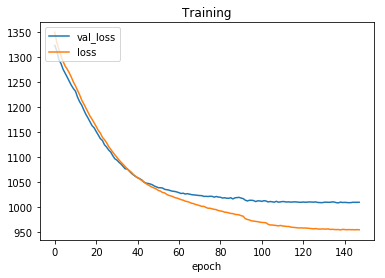

In [7]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

val_acc_pred   :  [0.9313646299044291, 0.9313187956809997, 0.9312411144574483, 0.931190046151479]
acc_pred   :  [0.9416467253140041, 0.9416592465809414, 0.9416934516770499, 0.9416729561941964]


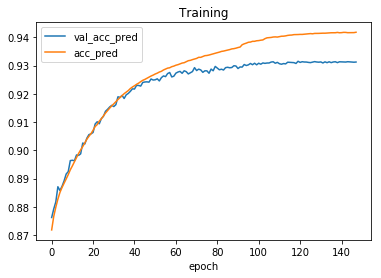

In [8]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

lr   :  [1.5625e-06, 1.5625e-06, 1.5625e-06, 1.5625e-06]


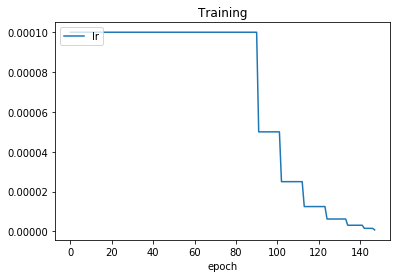

In [9]:
PlotHistory(model.history.history,listKeys=['lr'])

# Evaluate Model with Test dataset 

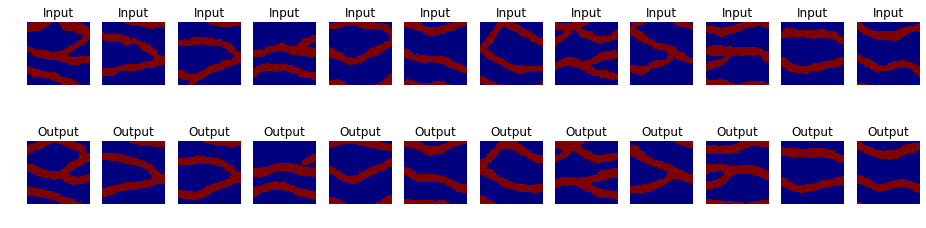

In [10]:
model_plot(x_test, model, num_plots = 12, type_model = "cvae_style")

# Generate random sampling

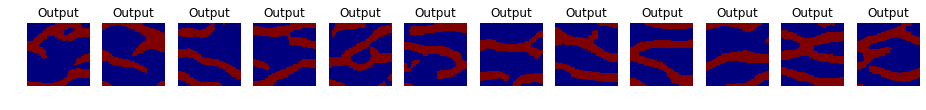

In [11]:
x_random = np.random.normal(0, 1, size=(20, 500))
model_plot(x_random, model, num_plots = 12, mode = "gen", figsize = (60,60), type_model = "cvae_style")